# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


# Volume Acceptance

In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\Forecast and Acceptance\\Volume Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
print(df_RT_Profit)

         f1_d5_upd33_t34  f1_d5_upd74_t75  f2_d5_upd28_t29  f2_d5_upd59_t60   
sto          3009.275842      3496.478812      1191.142056      2500.303559  \
det          3791.538309      4543.254242      -144.410671      2827.308395   
oracle       3808.381413      4628.392218      4293.322779      4210.343906   
feature      3021.217442      3508.045934      1192.721990      2370.902161   
rule         2853.990372      2767.291272      1437.739998      2837.179047   

         f2_d5_upd41_t42  f1_d5_upd69_t70  f2_d5_upd10_t11  f1_d5_upd47_t48   
sto          3063.468618      3473.682429      3019.469137      3460.000941  \
det          3030.174282      4562.643320      4009.916433      3966.006009   
oracle      10903.175965      4996.899471     16236.631697      5473.602542   
feature      2622.011990      2883.171241      3377.459057      3785.541434   
rule         1957.028857      4068.025351      3401.711440      3674.183768   

         f1_d5_upd22_t23  f1_d5_upd11_t12  ...  f2

In [4]:
#Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
print(np.shape(Array))
Array_V = Array[:,:,:,:,1,:]
print(np.shape(Array_V))

(2, 1, 88, 5, 2, 1)
(2, 1, 88, 5, 1)


In [5]:
Array_percent = np.mean(Array,axis=2)

In [6]:
print(np.shape(Array_percent))

(2, 1, 5, 2, 1)


[0, 1]


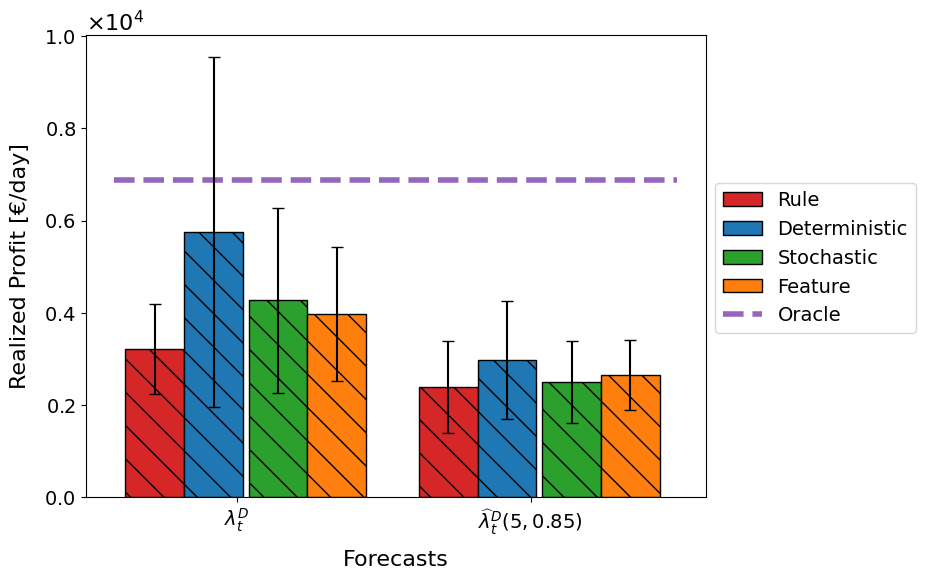

In [7]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5,0.85)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts",y_axis_label='Realized Profit [\u20AC/day]', x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_Bar_different_forecast_plot',bbox_to_anchor=(1.0, 0.7),legends=['Rule','Deterministic','Stochastic','Feature','Oracle'],ShowEachTestDay = False,save = True)

# 100% accepted

In [8]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\Forecast and Acceptance\\100 Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [9]:

df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
print(df_RT_Profit)
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array_100per = Array[:,:,:,:,1,:]

         f1_d5_upd33_t34  f1_d5_upd74_t75  f2_d5_upd28_t29  f2_d5_upd59_t60   
sto          3012.754395      3279.770839       249.364082      1771.733825  \
det          3808.381413      4628.392218      -201.614763      1389.483191   
oracle       3808.381413      4628.392218      4293.322779      4210.343906   
feature      3017.937645      3374.537027       201.206652      1910.687244   
rule         2853.990372      2767.291272      1437.739998      2837.179047   

         f2_d5_upd41_t42  f1_d5_upd69_t70  f2_d5_upd10_t11  f1_d5_upd47_t48   
sto          3344.419013      3231.124778      3410.126868      3424.987062  \
det          3349.421916      4996.899471      3451.502969      5473.602542   
oracle      10903.175965      4996.899471     16236.631697      5473.602542   
feature      2963.391939      2483.589122      3817.553537      3181.927847   
rule         1957.028857      4068.025351      3401.711440      3674.183768   

         f1_d5_upd22_t23  f1_d5_upd11_t12  ...  f2

In [10]:
Array_100 = np.mean(Array,axis=2)

[0, 1]


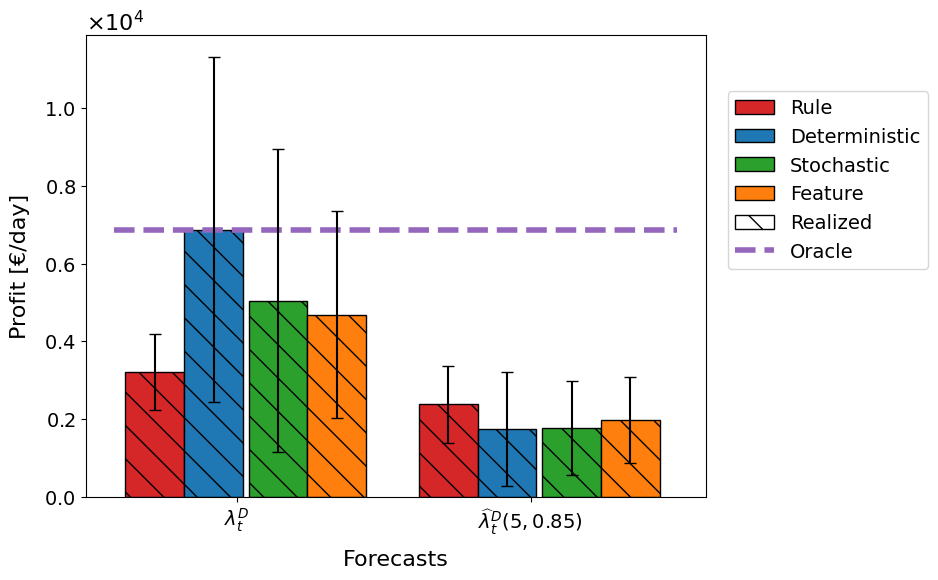

In [11]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5,0.85)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)

# Forecast Acceptance

         f1_d5_upd33_t34  f1_d5_upd74_t75  f2_d5_upd28_t29  f2_d5_upd59_t60   
sto          3019.512989      3506.884512       458.072060      2089.612993  \
det          3808.381413      4628.392218      -201.614763      1389.483191   
oracle       3808.381413      4628.392218      4293.322779      4210.343906   
feature      3025.747465      3507.270240       203.757624      1946.031139   
rule         2853.990372      2767.291272      1437.739998      2837.179047   

         f2_d5_upd41_t42  f1_d5_upd69_t70  f2_d5_upd10_t11  f1_d5_upd47_t48   
sto          3237.012704      3611.424881      3693.036539      4746.007344  \
det          3349.421916      4996.899471      3451.502969      5473.602542   
oracle      10903.175965      4996.899471     16236.631697      5473.602542   
feature      2926.312847      3497.840458      4389.291576      3787.325282   
rule         1957.028857      4068.025351      3401.711440      3674.183768   

         f1_d5_upd22_t23  f1_d5_upd11_t12  ...  f2

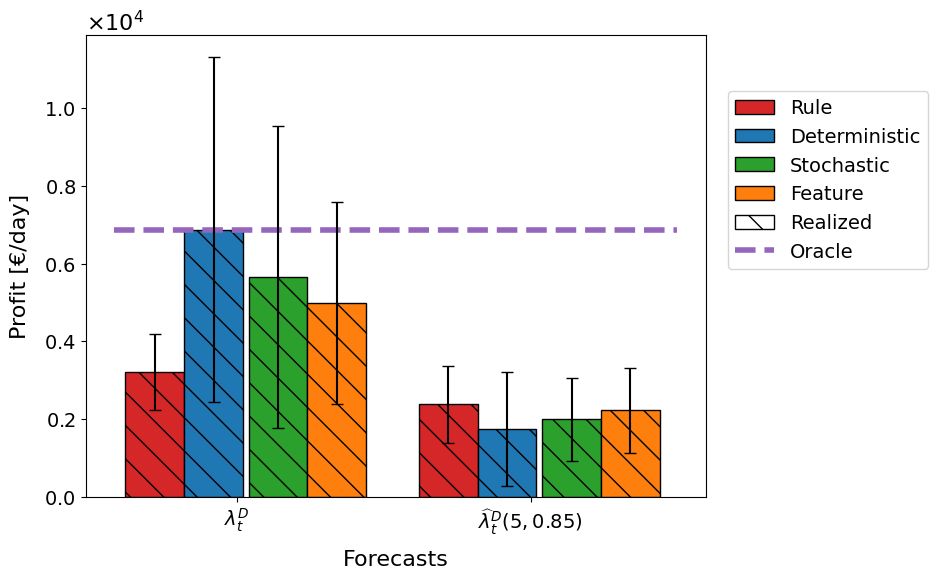

In [12]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\Forecast and Acceptance\\forecast Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
print(df_RT_Profit)
#Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array_perfect = np.mean(Array,axis=2)
Array_perf = Array[:,:,:,:,1,:]
print(Array_perfect)
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5,0.85)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)

In [13]:
np.shape(Array_perfect[1, 0, 1, 1, 0])

()

In [14]:
Array_perfect[1, 0, :, 1, 0]

array([2383.6157203 , 1754.83433246, 1995.46254827, 2223.95020565,
       6877.0498741 ])

### Table

In [15]:
lst = ["$\lambda_{t}^{D}$, $\widehat{y}(V)$",
       "$\lambda_{t}^{D}$, $\widehat{y}(100\%)$",
       "$\lambda_{t}^{D}$, $y$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(V)$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(100\%)$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(\lambda^{D}_{t}(5,0.85))$"]

result_summary = [[lst[0]] + [int(Array_percent[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[1]] + [int(Array_100[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[2]] + [int(Array_perfect[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[3]] + [int(Array_percent[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[4]] + [int(Array_100[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[5]] + [int(Array_perfect[1, 0, i, 1, 0]) for i in range(0, 4)]
                  ]
print(result_summary)

[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 4264, 3972], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 3214, 6875, 5050, 4688], ['$\\lambda_{t}^{D}$, $y$', 3214, 6875, 5662, 4983], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(V)$', 2383, 2969, 2490, 2642], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(100\\%)$', 2383, 1754, 1784, 1976], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(\\lambda^{D}_{t}(5,0.85))$', 2383, 1754, 1995, 2223]]


In [16]:

print(result_summary)
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)
# Generate LaTeX table code
table_code = "\\begin{table}[H]\n"
table_code += "\\centering\n"
table_code += "\\caption{Average realized Profit(in $\euro/day$) based on forecast(perfect and base case) and on acceptance(volume based and 100 \% accepted assumption)}\n"
table_code += "\\label{tab:Forecast_acceptance}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 4264, 3972], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 3214, 6875, 5050, 4688], ['$\\lambda_{t}^{D}$, $y$', 3214, 6875, 5662, 4983], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(V)$', 2383, 2969, 2490, 2642], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(100\\%)$', 2383, 1754, 1784, 1976], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(\\lambda^{D}_{t}(5,0.85))$', 2383, 1754, 1995, 2223]]
+------------------------------------------------------------------------+--------+-----------------+--------------+-----------+
|                                                                        |   Rule |   Deterministic |   Stochastic |   Feature |
+========================================================================+========+=================+==============+===========+
| $\lambda_{t}^{D}$, $\widehat{y}(V)$                                    |   3214 |            5753 |         4264 |      3972 |
+-------------------

## Creating a combines acceptance and forecast bar plot

In [17]:
def plot_profit_Test(Array, PlotCase = "", Selected_models = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle'], x_axis_label = "Forecasts", x_axis_selection = [0,1,2], x_axis_tick_label = [1,2,3], 
                     y_axis_label =  'Profit [\u20AC/day]', Selected_Profit = ['Expected', 'Realized'], 
                     barwidth = 0.1, errorbar = False,
                     bbox_to_anchor=(1.02, 0.9),legends = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle','V','100'], 
                     ShowEachTestDay = False, pdf_name = 'Profit_Bar_plot' ,save = False):

    # Sample data
    #Array = np.random.rand(3, 6, 88, 5, 2)
    # PlotCase = 'Forecast' , 'Sample Size', ''
    #Forecast_names = [1,2,3]
    #SampleSize_names = [2,5,7,9,11]
    
    
    # Default settings
    color = ['C3', 'C0', 'C2', 'C1']  # Colors for the fourth dimension
    Model = ['Rule', 'Deterministic', 'Stochastic', 'Feature']
    Profit_labels = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"]  # Fill patterns for the fifth dimension
    Profit_patterns = ['', 'x','.']  # Fill patterns for the fifth dimension
    # /   - diagonal hatching
    # \   - back diagonal
    # |   - vertical
    # -   - horizontal
    # +   - crossed
    # x   - crossed diagonal
    # o   - small circle
    # O   - large circle
    # .   - dots
    # *   - stars
    bar_count = (len(Selected_models)) * len(Selected_Profit) # Number of bars in each group (5-1)*2
    if "Oracle" in Selected_models:
        linestyle = '--'
        linecolor = 'C4'
        linelabel = 'Oracle'
        bar_count = (len(Selected_models)-1) * len(Selected_Profit) # Number of bars in each group (5-1)*2
        

    # From Selected_models and Selected_Profit specify necessary settings aligned with the default
    model_idx = [i for i, m in enumerate(Model) if m in Selected_models]
    models = [Model[i] for i, m in enumerate(Model) if m in Selected_models]
    colors = [color[i] for i, m in enumerate(Model) if m in Selected_models]
    profit_idx = [i for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns_label = [Profit_labels[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]
    fill_patterns = [Profit_patterns[i] for i, p in enumerate(Profit_labels) if p in Selected_Profit]  # Fill patterns for the fifth dimension
    
    mean_values = np.mean(Array, axis=2)
    std_values = np.std(Array, axis=2)

    if PlotCase == "":
        x_axis_label = '' 
        xtick_names = 'off'
        x_axis = [1]
        
    else:
        x_axis = np.arange(len(x_axis_selection))
        xtick_names = x_axis_tick_label

    # Fixed settings

    y_axis_label = y_axis_label
    test_days = np.arange(Array.shape[2])

    legend_labels = models
    legend_colors = colors

    edgecolor = "black"
    linewidth = 4
    
    # Build the bar sizing and spacing
    bar_list = [i*0 for i in range(bar_count)]
    spacing = barwidth/10
    for i in range(bar_count):
        if i == 0:
            bar_list[i] = -(barwidth * bar_count / 2) + i * barwidth
        else:
            bar_list[i] = bar_list[i-1] + barwidth
        
        if i % 2 == 0:
            bar_list[i] = bar_list[i] + spacing
        
    size_around_tick = barwidth * bar_count / 2 + barwidth/2   

    

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Build the oracle model:

    # Plot value of the oracle model
    if "Oracle" in Selected_models:
        mean_value = np.mean(Array[0, 0, :, 4, 1,0])
        lines = ax.hlines(mean_value, 0 - size_around_tick + 4 *spacing, len(x_axis)/2 - 1 + size_around_tick, color=linecolor, linestyle=linestyle, linewidth=linewidth)

    if  "Det$\left(y(\lambda, \widehat{\lambda})\\right)$" in legends:
        mean_value = np.mean(Array[0, 0, :, 1, 3,0])
        lines2 = ax.hlines(mean_value, len(x_axis)/2 - 0.4, len(x_axis) - 1 + size_around_tick, color='C0', linestyle=linestyle, linewidth=linewidth)


    for x,xaxis  in enumerate(x_axis_selection):
        count_j = 0
        count_k = 0
        for j, color in enumerate(colors):
            for k, fill_pattern in enumerate(fill_patterns):
                # construct where on the x axis the bar is located

                # To get a little bit of spacing after each model
                
                j_mod = model_idx[j]
                k_mod = profit_idx[k]

                if PlotCase == 'Forecasts':
                    bar_left = x + bar_list[count_k]
                    f = x
                    s = 0
                    m = 0   

                elif PlotCase == 'Sample size':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = x
                    m = 0
                
                elif PlotCase == 'Model Exploration':
                    bar_left = x + bar_list[count_k]
                    f = 0
                    s = 0
                    m = x

                else:
                    bar_left = bar_list[count_k]
                    f = 0
                    s = 0
                    m = 0


                
                # Define the height of the bar
                bar_height = mean_values[f,s,j_mod,k_mod,m]
                error_value = std_values[f,s,j_mod,k_mod,m]

                

                ax.bar(bar_left, bar_height, width=barwidth, color=color, hatch=fill_pattern, align='edge', edgecolor=edgecolor)

                x_position = bar_left + barwidth/2
                if errorbar == True:
                    ax.errorbar(x_position, bar_height, yerr=error_value, fmt='none', ecolor='black', capsize=4)

                if ShowEachTestDay == True:
                    for d,val in enumerate(test_days):
                        #print("(",bar_left,",",Array[x,2,d,j,k],")")
                        
                        ax.scatter(x_position,Array[f,s,j_mod,k_mod],s=2, edgecolor=edgecolor, color=color)

                count_k = count_k + 1
            count_j = count_j + 1




    # Set the x-axis ticks and tick labels
    
    if xtick_names != 'off':
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xtick_names, fontsize=16)
        ax.set_xlabel(x_axis_label, fontsize=16, labelpad=10)
    else:
        # Remove x axis
            
        #ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xlabel('')


    ax.set_ylabel(y_axis_label, fontsize=16, labelpad=10)
    # Set the y-axis tick formatter
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 2))  # Adjust the power limits as needed
    plt.gca().yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_fontsize(16)  # Set the font size
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_tick_params(labelsize=14)

    # Create legend for the bars
    legend_handles = []

    for label, color in zip(legend_labels, legend_colors):
        if label in legends:
            rect = plt.Rectangle((0, 0), 1, 1, color=color, label=label)
            rect.set_edgecolor(edgecolor)
            legend_handles.append(rect)



    for label, pattern in zip(fill_patterns_label, fill_patterns):
        if label in legends: 
            legend_handles.append(plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor=edgecolor,  hatch=pattern, label=label))

    if "Oracle" in Selected_models:
        # Create legend for the horizontal line
        if "Oracle" in legends:
            legend_handles.append(plt.Line2D([0], [0], color=linecolor, linestyle=linestyle, label="Oracle",linewidth=linewidth))
        
        if "Det$\left(y(\lambda, \widehat{\lambda})\\right)$" in legends:
            legend_handles.append(plt.Line2D([0], [0], color='C0', linestyle=linestyle, label="Det$\left(y(\lambda, \widehat{\lambda})\\right)$",linewidth=linewidth))
    
    # Show the legend
    ax.legend(handles=legend_handles,bbox_to_anchor=bbox_to_anchor, loc='upper left',prop={'size': 14})



    if save == True:
        plt.savefig(f'Result_plots/'+ pdf_name +'.pdf',format="pdf", bbox_inches='tight')
    # Show the plot
    plt.show()

# Best possible outcome when having a forecast

In [18]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Forecast with perfect acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
#print(df_RT_Profit)
#Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=2, SampleSizes=[5])
Array_Oracle_acceptance = np.mean(Array,axis=2)
Array_Oracle_acc = Array[:,:,:,:,1,:]
#print(Array_perfect)
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5,0.85)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
#print(x_axis_selection)
#print()
#plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)

In [19]:

Array_V_100_f = Array
print(Array_V_100_f.shape)
Array_V_100_f[:,:,:,:,0,:] = Array_V

# Create an array of zeros with the desired shape
zeros_array = np.zeros((2, 1, 88, 5, 2, 1))

# Concatenate Array_V_100_f and the zeros array along the fourth dimension
appended_array = np.concatenate((Array_V_100_f, zeros_array), axis=4)

# Verify the shape of the appended array
print(appended_array.shape)

appended_array[:,:,:,:,1,:] = Array_100per
appended_array[:,:,:,:,2,:] = Array_perf
appended_array[:,:,:,:,3,:] = Array_Oracle_acc

(2, 1, 88, 5, 2, 1)
(2, 1, 88, 5, 4, 1)


[0, 1]


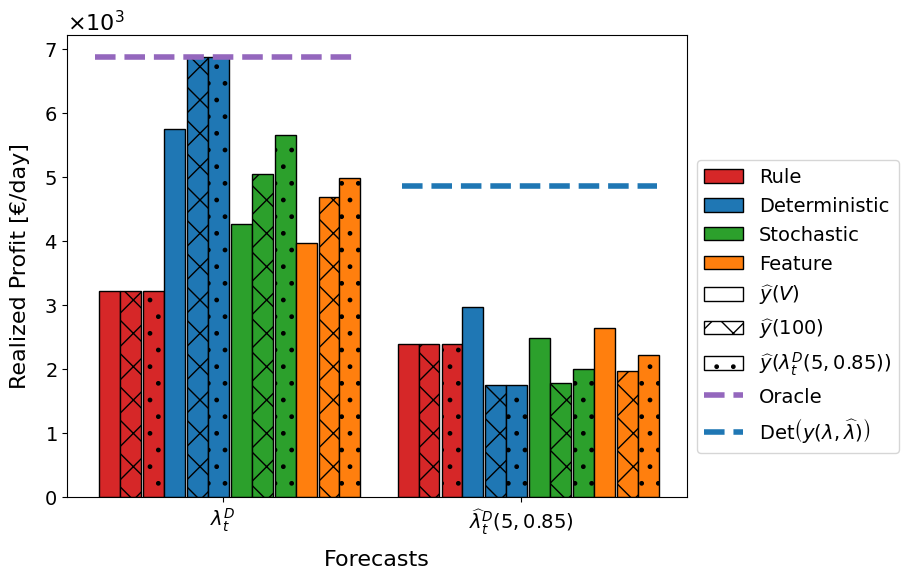

In [20]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5,0.85)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)
Selected_Profit = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"]
legends = ["Rule","Deterministic","Stochastic","Feature","Oracle","Det$\left(y(\lambda, \widehat{\lambda})\\right)$","$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"]
plot_profit_Test(appended_array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = Selected_Profit, barwidth = 0.07,legends = legends,bbox_to_anchor=(1.0, 0.75), y_axis_label= 'Realized Profit [\u20AC/day]',pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = True)

# BIDDING BEHAVIOR - QUANTITIES

In [21]:
lst = ["$\lambda_{t}^{D}$, $\widehat{y}(V)$",
       "$\lambda_{t}^{D}$, $\widehat{y}(100\%)$",
       "$\lambda_{t}^{D}$, $y$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(V)$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(100\%)$",
       "$\widehat{\lambda}_{t}^{D}(5)$, $\widehat{y}(\lambda^{D}_{t}(5,0.85))$",
        "$\widehat{\lambda}_{t}^{D}(5)$, $y$"]

result_summary = [[lst[0]] + [int(Array_percent[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[1]] + [int(Array_100[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[2]] + [int(Array_perfect[0, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[3]] + [int(Array_percent[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[4]] + [int(Array_100[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[5]] + [int(Array_perfect[1, 0, i, 1, 0]) for i in range(0, 4)],
                  [lst[6]] + [int(Array_Oracle_acceptance[1, 0, i, 1, 0]) for i in range(0, 4)]
                  ]
print(result_summary)
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)

[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 4264, 3972], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 3214, 6875, 5050, 4688], ['$\\lambda_{t}^{D}$, $y$', 3214, 6875, 5662, 4983], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(V)$', 2383, 2969, 2490, 2642], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(100\\%)$', 2383, 1754, 1784, 1976], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $\\widehat{y}(\\lambda^{D}_{t}(5,0.85))$', 2383, 1754, 1995, 2223], ['$\\widehat{\\lambda}_{t}^{D}(5)$, $y$', 2383, 3761, 1816, 2636]]
+------------------------------------------------------------------------+--------+-----------------+--------------+-----------+
|                                                                        |   Rule |   Deterministic |   Stochastic |   Feature |
+========================================================================+========+=================+==============+===========+
| $\lambda_{t}^{D}$, $\widehat{y}(V)$                                    |   3214 

# For Bidding quantities in perfect forecast

In [22]:
Add_on_paths = ["\\Results\\Different forecasts\\Forecast and Acceptance\\Volume Acceptance\\",
                "\\Results\\Different forecasts\\Forecast and Acceptance\\100 Acceptance\\",
                "\\Results\\Different forecasts\\Forecast and Acceptance\\forecast Acceptance\\"] 
Array_Acceptance, Array_Bid,Array_Comp = Collect_bid_results(current_directory,Add_on_paths,1,[5,5,5,5],models=["Rule","Det","Sto","Feature","Oracle"])


(6, 24, 5, 3)


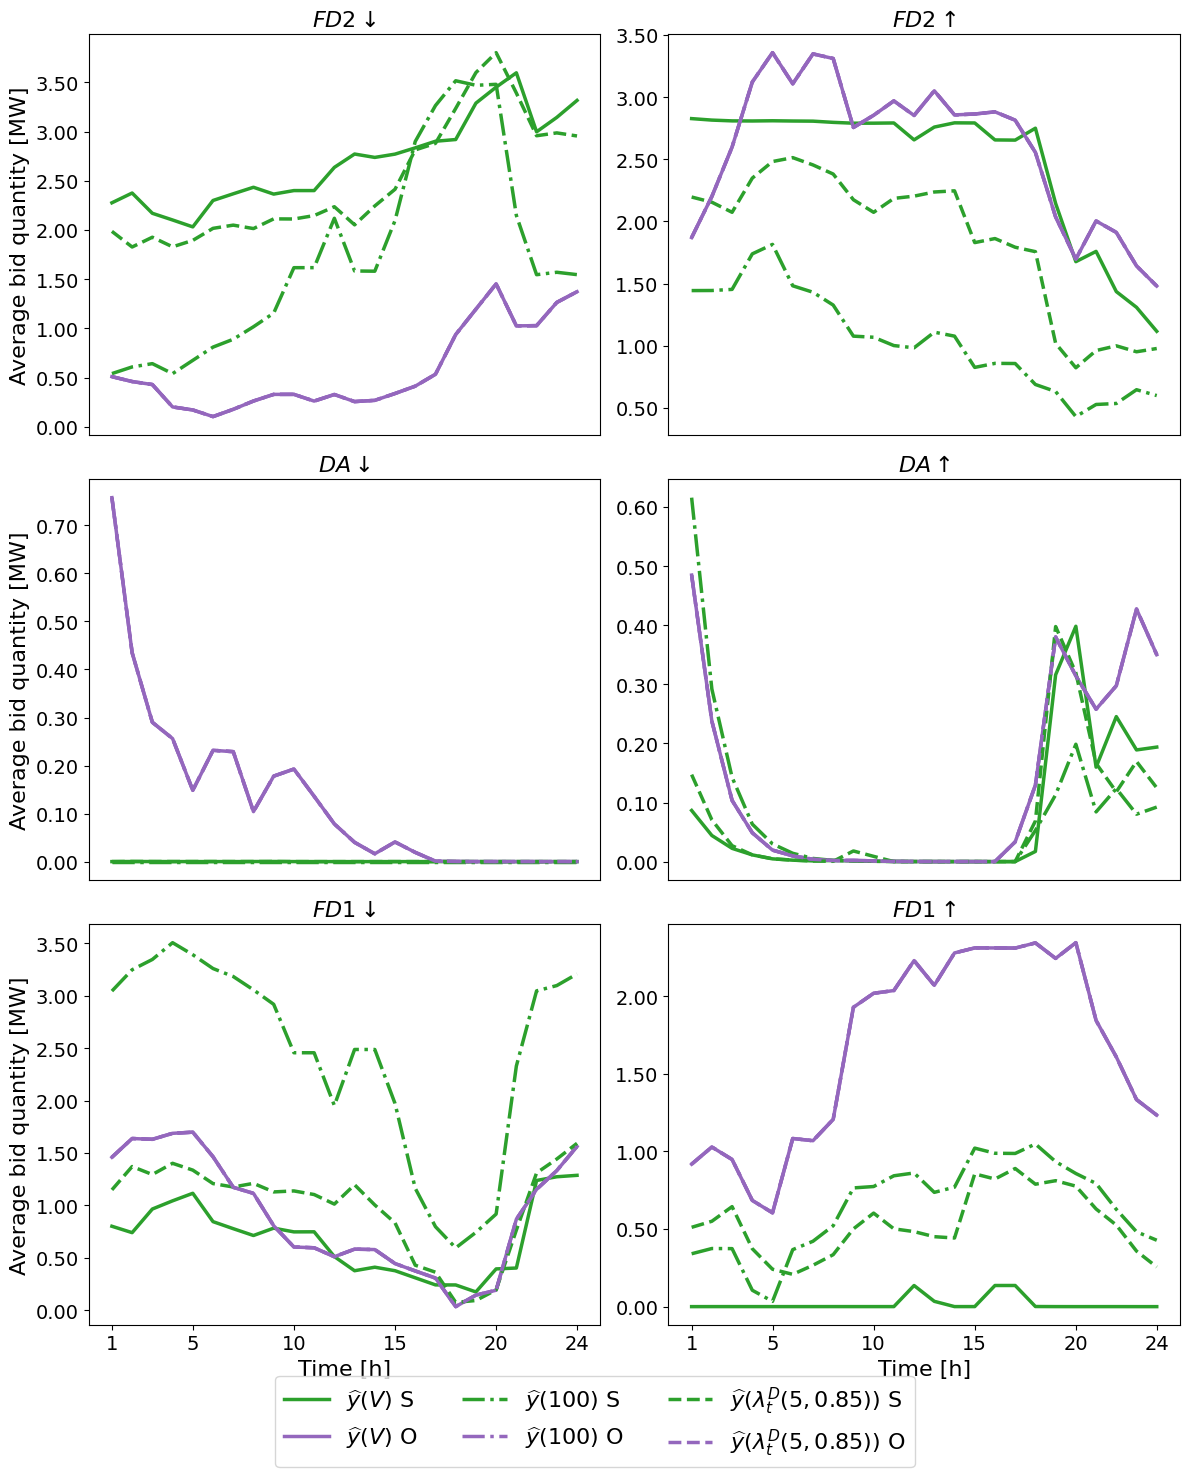

In [23]:
Plot_average_bid_quantities(Array_Bid,Selected_models = ["Stochastic","Oracle"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"] ,linestyle = ["-","-.","--",":"])

(6, 24, 5, 3)


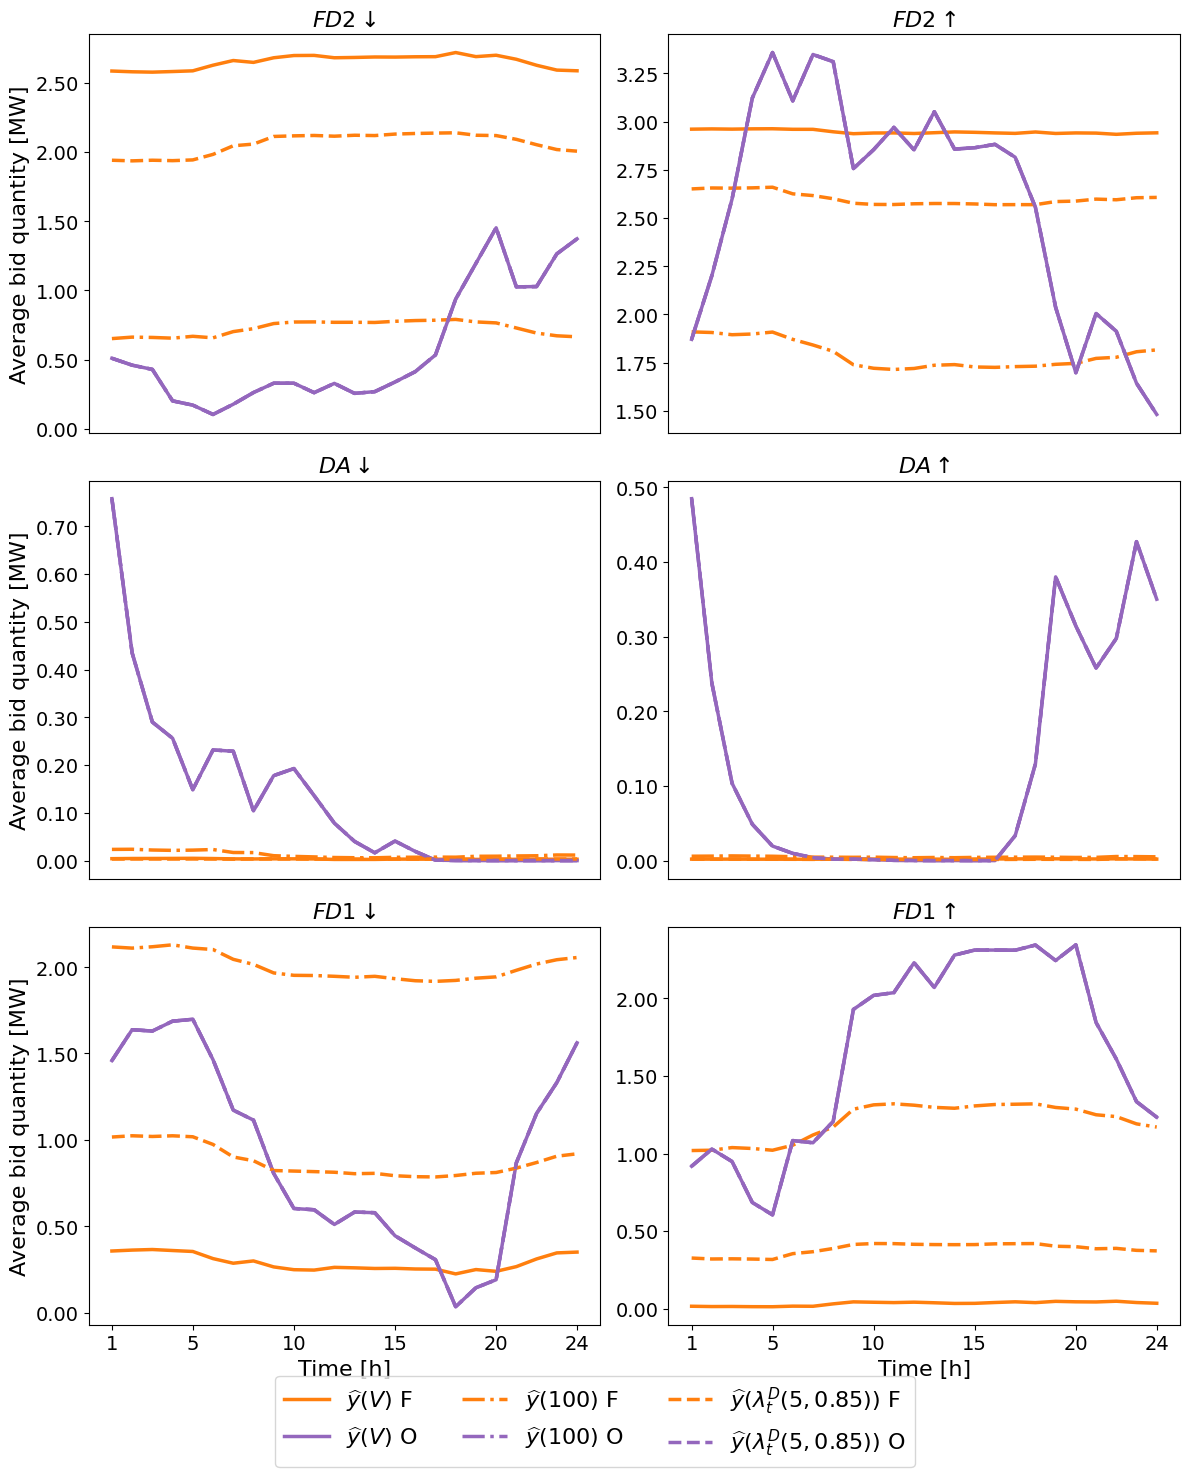

In [24]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Feature","Oracle"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"] ,linestyle = ["-","-.","--",":"])

(6, 24, 5, 3)


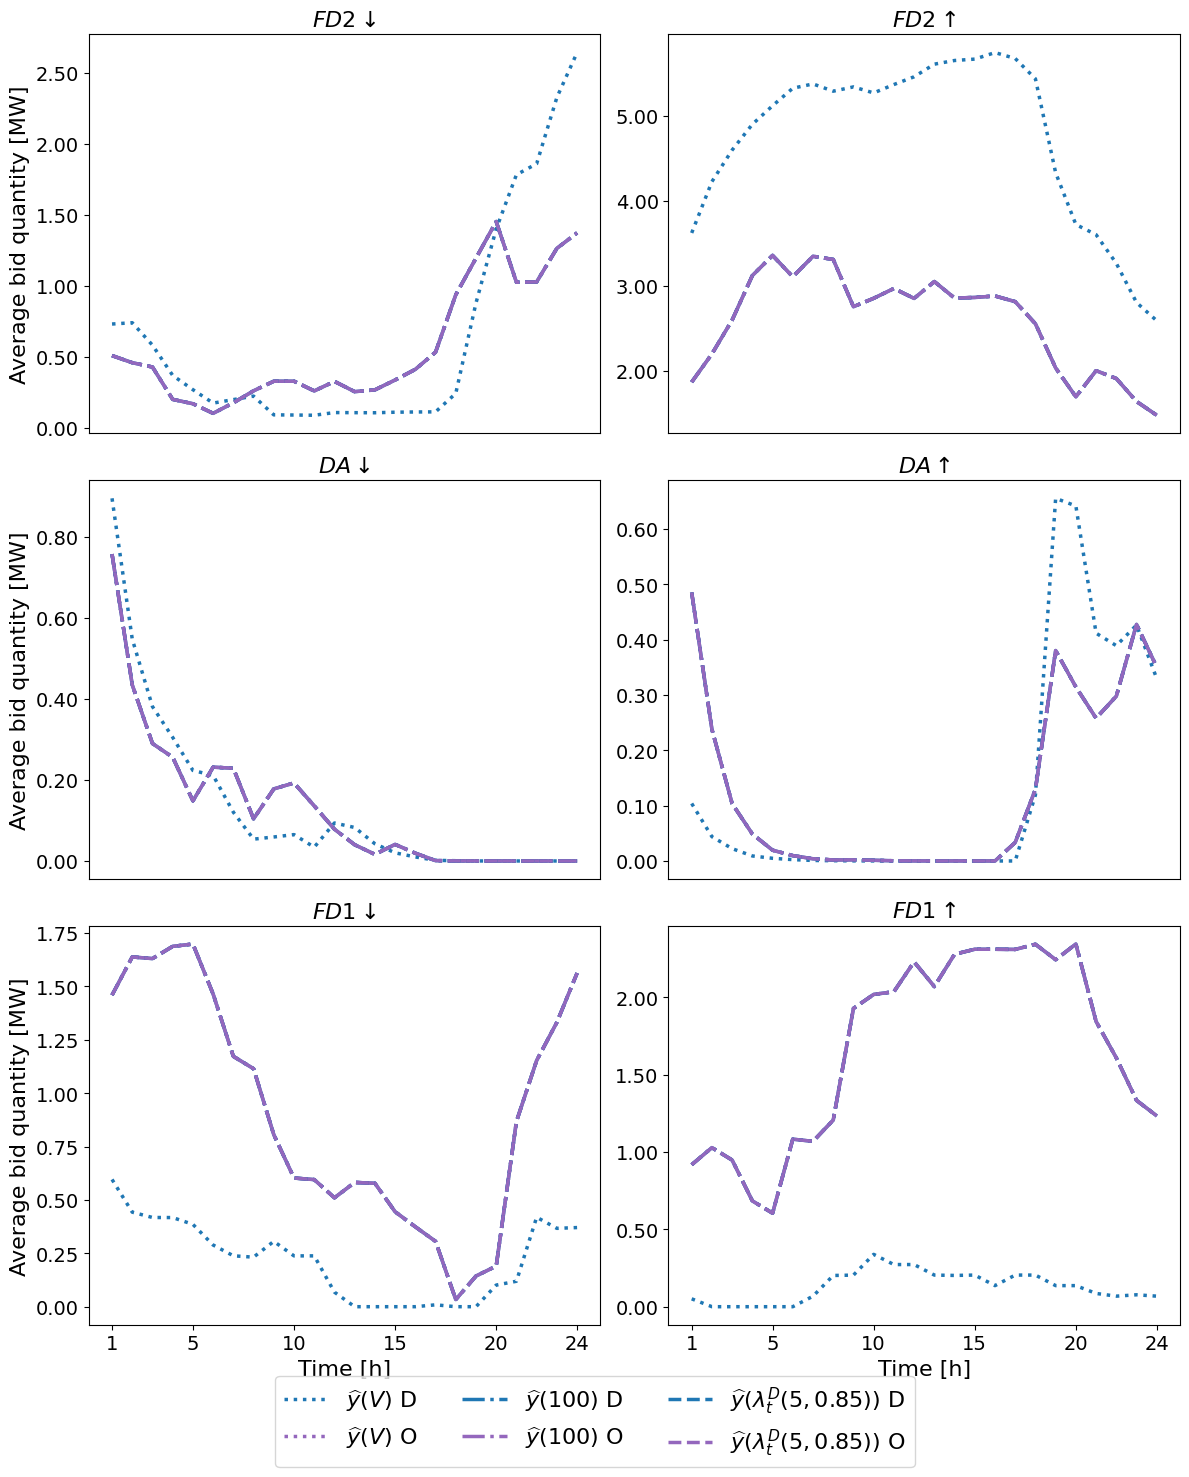

In [25]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Deterministic","Oracle"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"] ,linestyle = [":","-.","--",":"])

# For Bidding quantities in forecast

In [26]:
Add_on_paths = ["\\Results\\Different forecasts\\Forecast and Acceptance\\Volume Acceptance\\",
                "\\Results\\Different forecasts\\Forecast and Acceptance\\100 Acceptance\\",
                "\\Results\\Different forecasts\\Forecast and Acceptance\\forecast Acceptance\\",
                "\\Results\\Forecast with perfect acceptance\\"] 
Array_Acceptance_Bid, Array_Bid,Array_Comp = Collect_bid_results(current_directory,Add_on_paths,2,[5,5,5,5],models=["Rule","Det","Sto","Feature","Oracle"])


## Bidding strategy for Stochastic versus best possible

(6, 24, 5, 4)


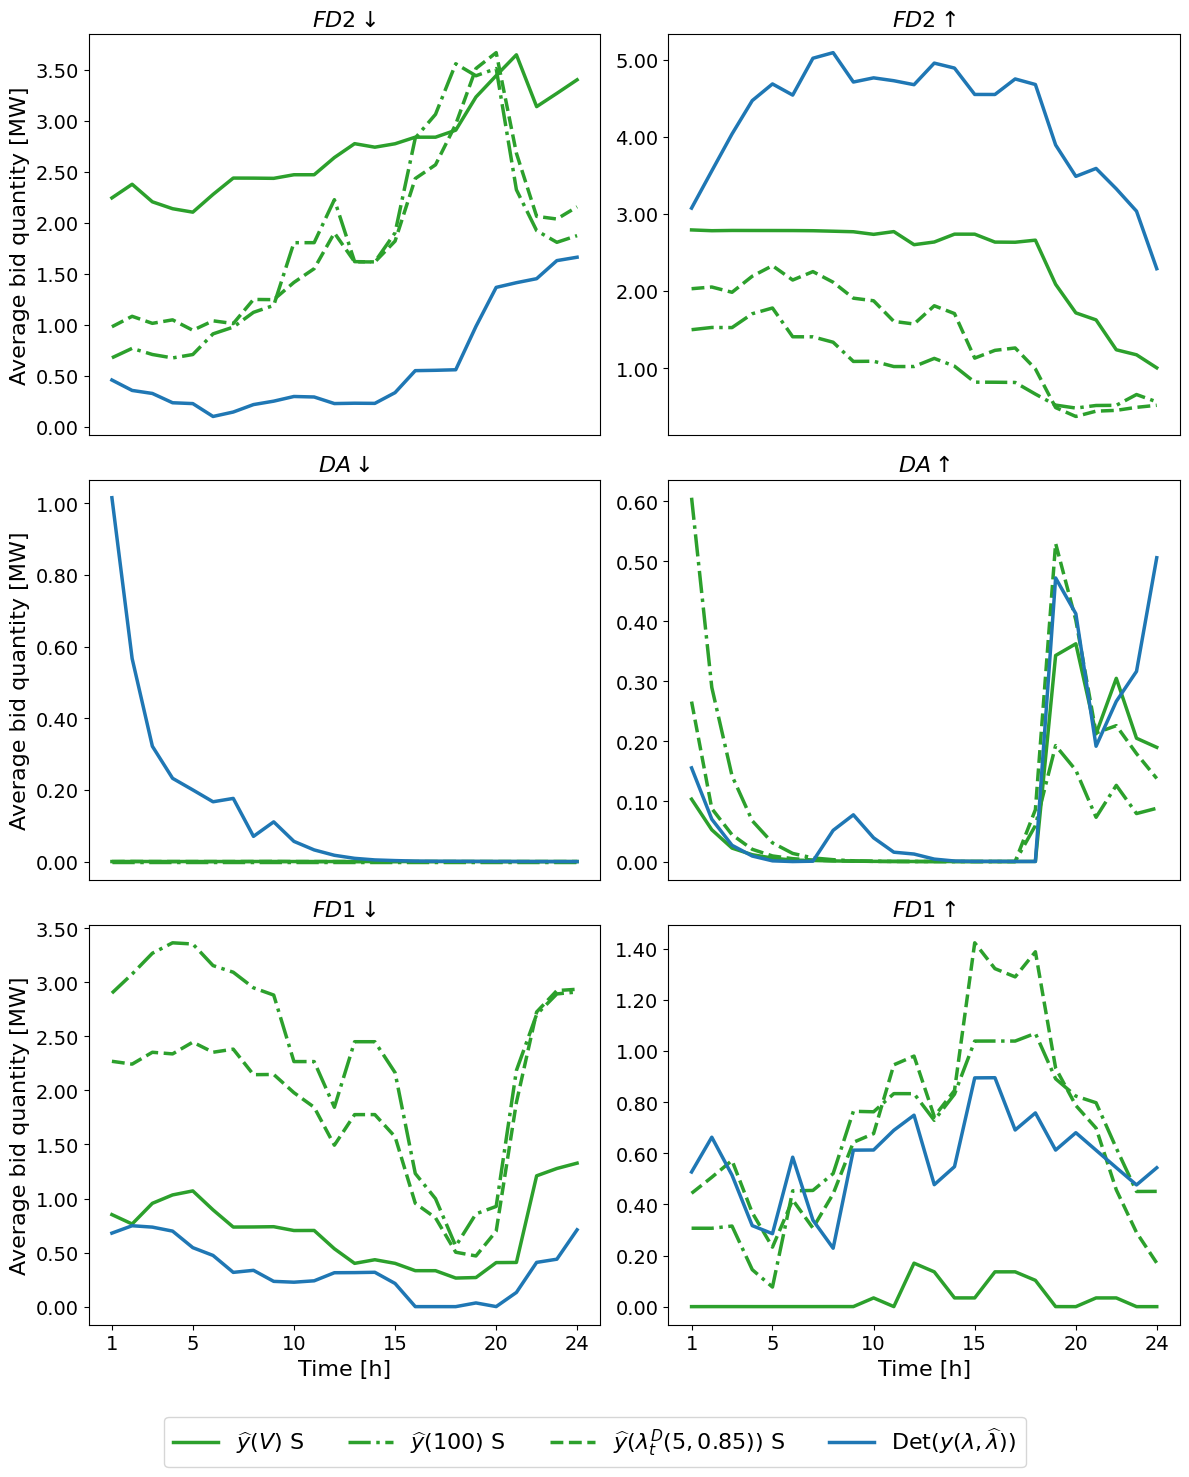

In [27]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Stochastic"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$","Perfect Acceptance"] ,linestyle = ["-","-.","--",":"],pdf_name='sto_for',save=True)

## Best bidding strategi for feature versus best possible

(6, 24, 5, 4)


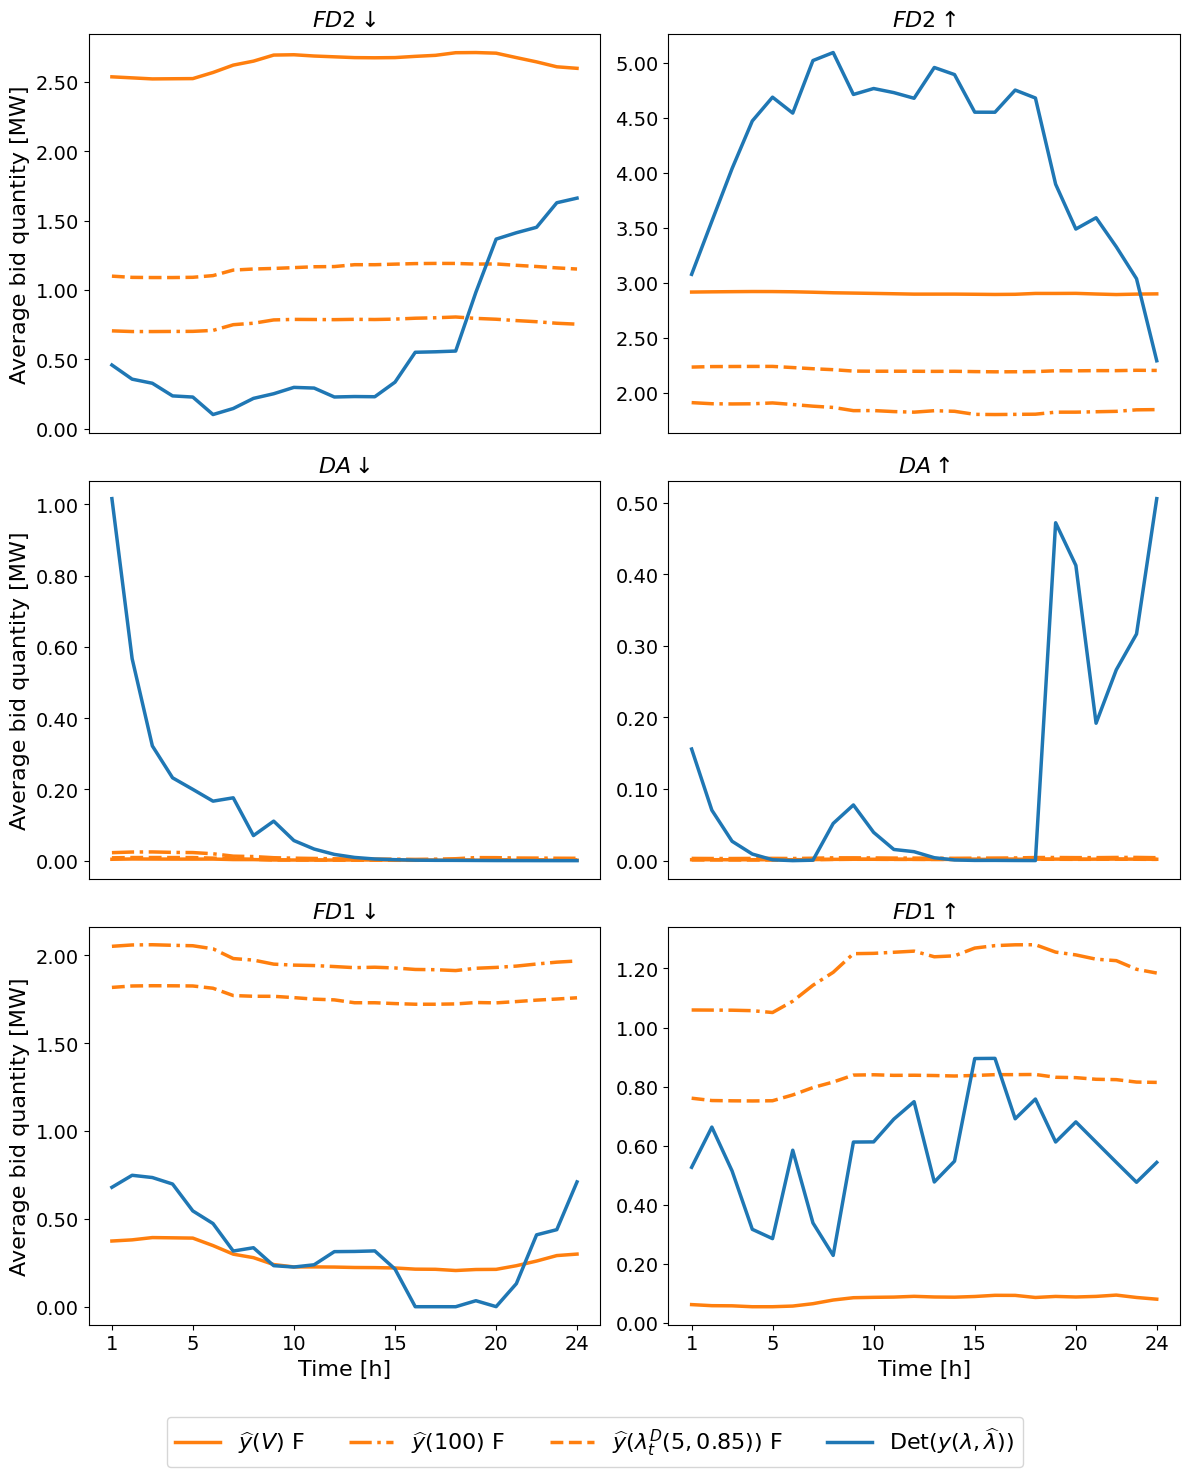

In [28]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Feature"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$","Perfect Acceptance"] ,linestyle = ["-","-.","--",":"],pdf_name='fea_for',save=True)

## Best bidding strategi for feature versus best possible

(6, 24, 5, 4)


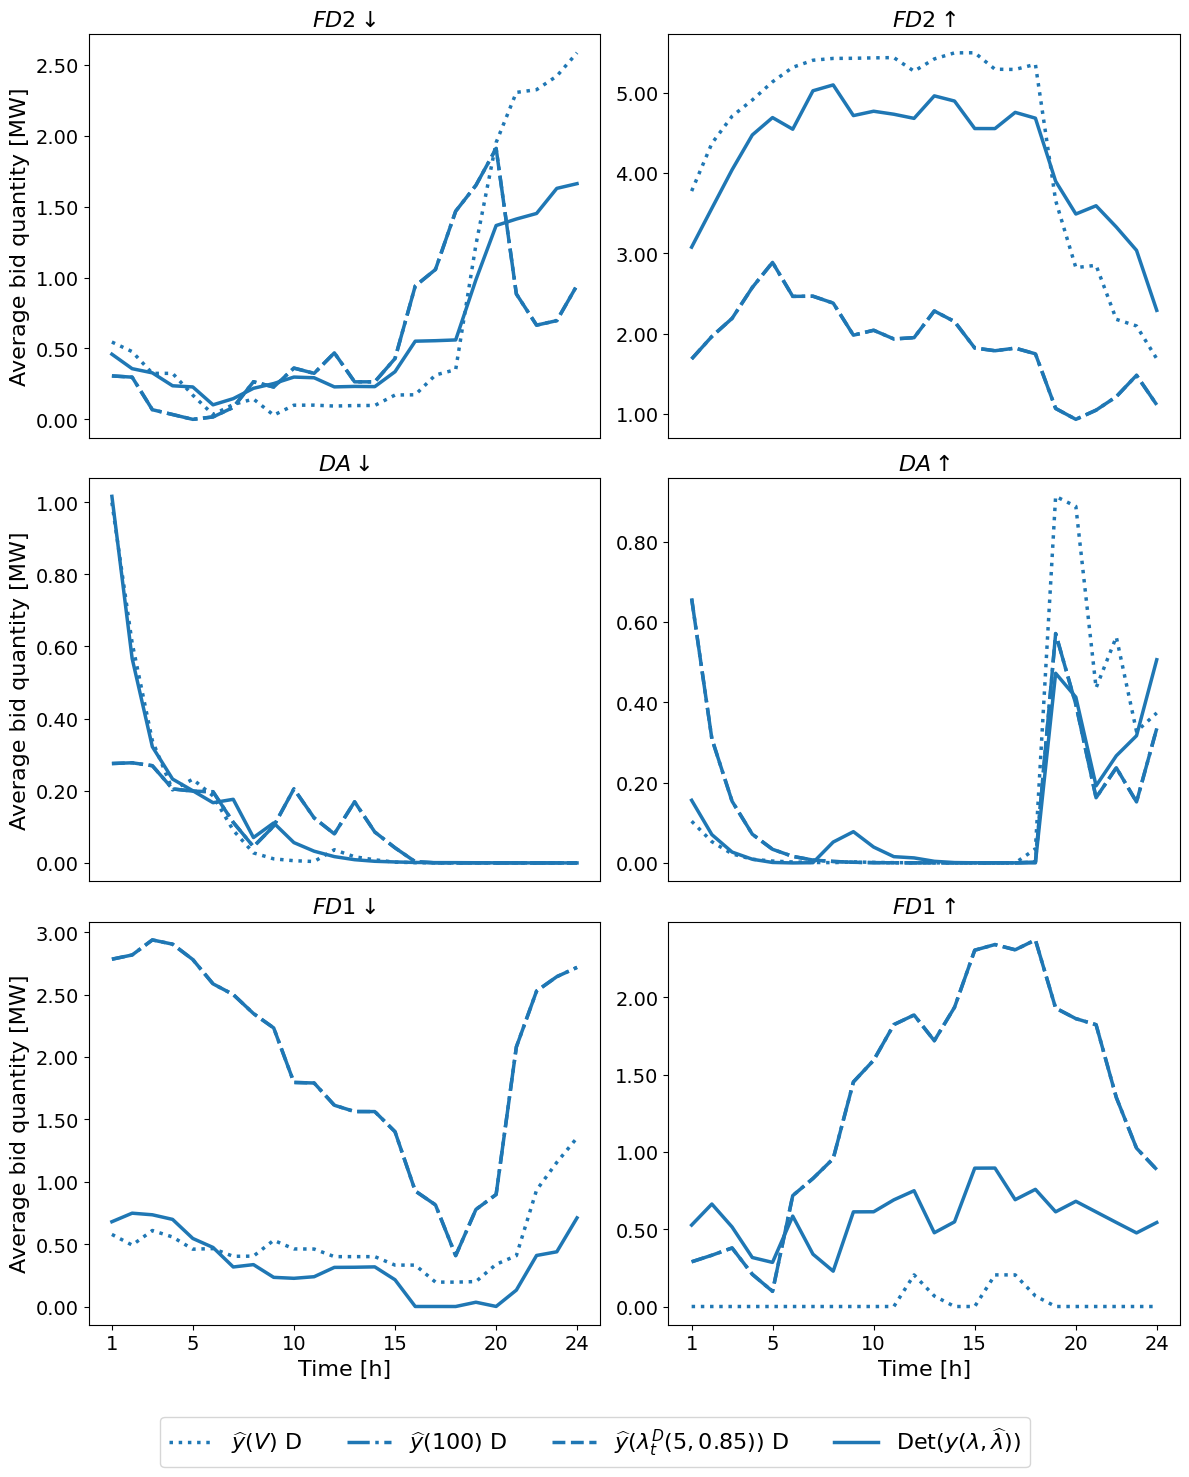

In [29]:

Plot_average_bid_quantities(Array_Bid,Selected_models = ["Deterministic"],Names = ["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$","Perfect Acceptance"] ,linestyle = [":","-.","--",":"])

## Specific bid

In [30]:
print("hej")
Array_bid_sum = np.sum(np.sum(Array_Bid,axis=2),axis=1)
print(np.shape(Array_Bid))
print(np.shape(Array_bid_sum))
print(Array_bid_sum[:,1,:])

hej
(6, 24, 88, 5, 4)
(6, 5, 4)
[[1449.53252233 1199.44348144 1199.44348144 1242.75722431]
 [9522.05700918 3960.68182596 3960.68182596 8923.33451341]
 [ 244.00220995  210.78398496  210.78398496  263.02946073]
 [ 328.76458086  273.6736594   273.6736594   231.74912734]
 [1061.65433081 4174.33313673 4174.33313673  714.45934361]
 [  65.98934686 2853.08391151 2853.08391151 1219.19016896]]


In [31]:
print("hej")
Array_Acceptance_Bid_sum = np.sum(np.sum(Array_Acceptance_Bid,axis=2),axis=1)
print(np.shape(Array_Bid))
print(np.shape(Array_bid_sum))
print(Array_Acceptance_Bid_sum[:,1,:])

hej
(6, 24, 88, 5, 4)
(6, 5, 4)
[[9.92502984e+02 9.90271874e+02 9.90271874e+02 1.24275722e+03]
 [8.87925694e+03 3.37042254e+03 3.37042254e+03 8.92333451e+03]
 [2.44002210e+02 2.10783985e+02 2.10783985e+02 2.63029461e+02]
 [3.28764581e+02 2.73673659e+02 2.73673659e+02 2.31749127e+02]
 [5.72824748e+01 7.14942456e+02 7.14942456e+02 7.14459344e+02]
 [5.99896283e+00 5.83623391e+02 5.83623391e+02 1.21919017e+03]]


In [32]:
Bid_mean = np.mean(Array_Bid, axis=2)
Bid_mean[1,:,3,0]
Bid_mean[1,:,3,1]
Feature = Bid_mean[1,:,3,2]
Deterministic_perfect_acceptance = Bid_mean[1,:,1,3]


(6, 24, 5, 4)
0
1
2


0
1
2
0
1
2


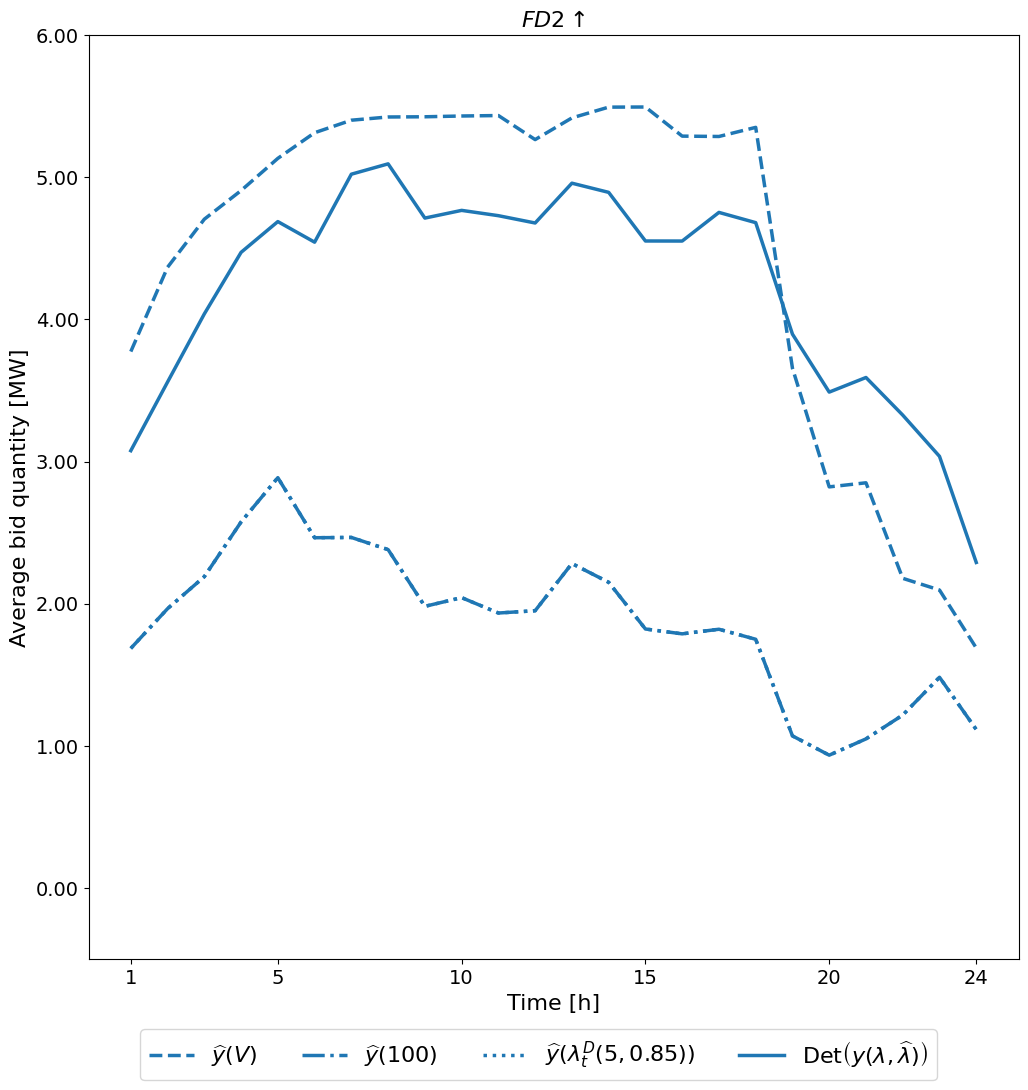

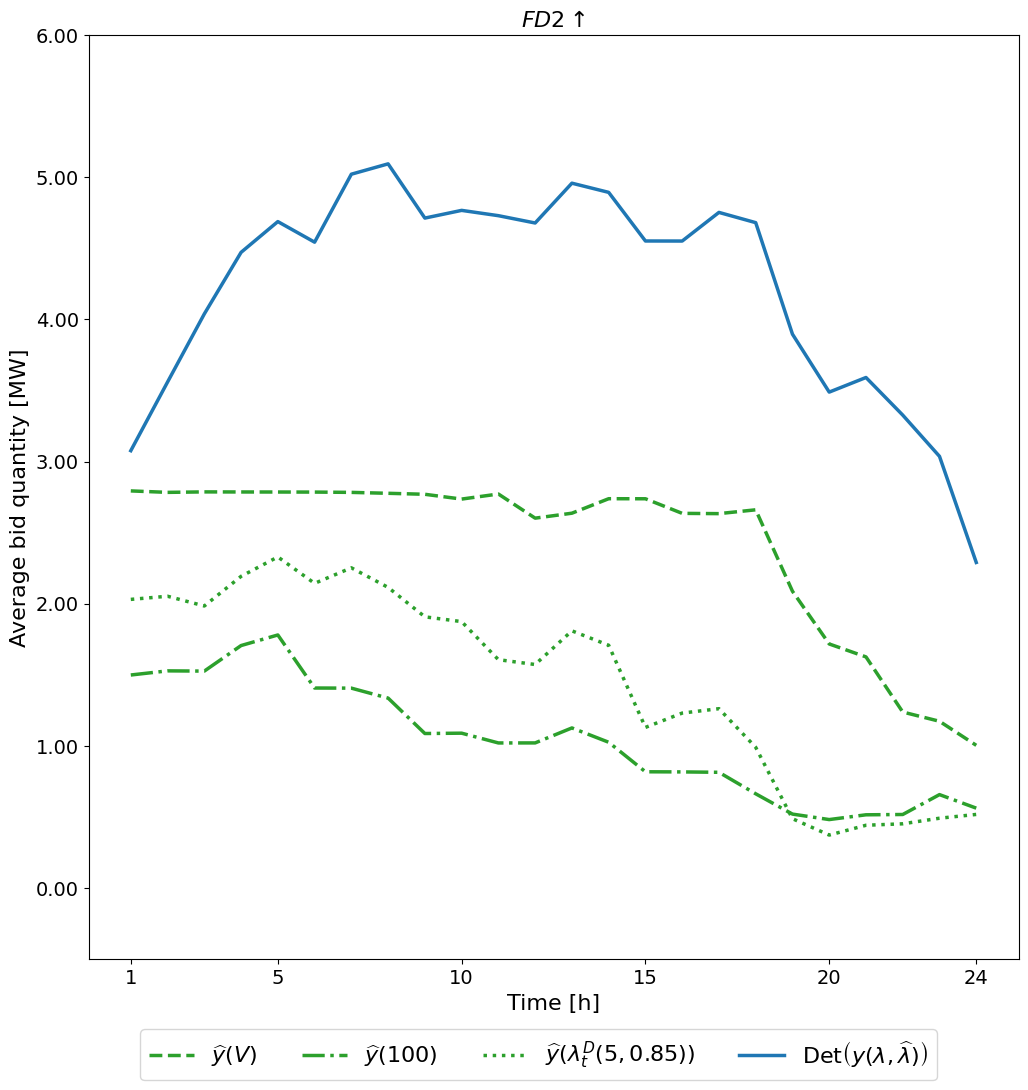

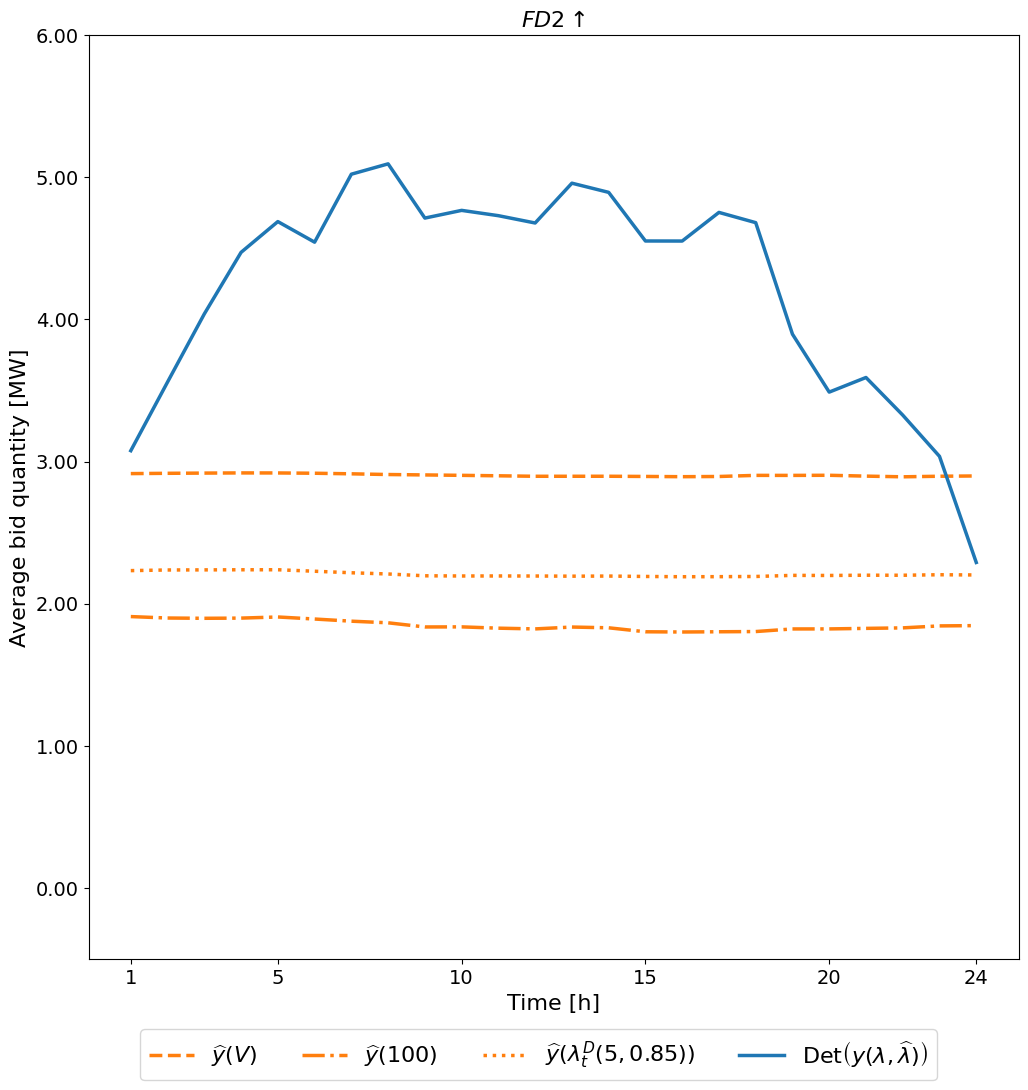

In [33]:
["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$","Perfect Acceptance"]
print(np.shape(Bid_mean))
x = np.arange(1, 25)
bid_quantities = "b_FD2_up"
bid_quantities_label = "$FD2\\uparrow$"
Model = ["Rule", "Deterministic", "Stochastic", "Feature", "Oracle"]
modelname = ["D", "S", "F"]
color = ['C0', 'C2', 'C1']
linestyle = ['--', '-.', ':']
models = ["Deterministic", "Stochastic", "Feature"]

for m, model in enumerate(models):
    fig, axs = plt.subplots(figsize=(12, 12))
    for a,acceptance in enumerate(["$\widehat{y}(V)$","$\widehat{y}(100)$","$\widehat{y}(\lambda^{D}_{t}(5,0.85))$"]): # Acceptance
        print(a)

        axs.plot(x, Bid_mean[1, :, m+1,a], label=acceptance,color=color[m], linestyle = linestyle[a],linewidth=2.5)

    axs.plot(x, Bid_mean[1, :, 1,3],  label ="Det$\left(y(\lambda, \widehat{\lambda})\\right)$",color=color[0], linestyle = "-",linewidth=2.5)

    axs.set_title(bid_quantities_label, fontsize=16)
    axs.set_xticks([1,5,10,15,20,24])
    axs.set_xlabel('Time [h]')
    formatter = ScalarFormatter(useOffset=False,useMathText=True)
    formatter.set_powerlimits((-1, 2))
    axs.yaxis.set_major_formatter(formatter)
    axs.yaxis.set_major_formatter('{x:.2f}')
    axs.set_ylim(-0.5,6)
    axs.set_ylabel('Average bid quantity [MW]')
    handles, labels = axs.get_legend_handles_labels()
    legend = fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.0),
                            prop={'size': 16})  # Adjust the fontsize of the legend here
    axs.tick_params(axis='both', which='both', labelsize=14)  # Adjust the fontsize of the axis ticks here
    axs.xaxis.label.set_fontsize(16)  # Adjust the fontsize of the x-axis label here
    axs.yaxis.label.set_fontsize(16) 
    plt.savefig('Bid_quantities_' + model +'.pdf', format="pdf", bbox_inches="tight")
    